In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [6]:
neighbors_setting = list(range(1, 26))

scores = []

for k in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [7]:
scores

[0.95,
 0.95,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9666666666666667,
 0.9833333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.95]

Text(0, 0.5, 'Testing Accuracy')

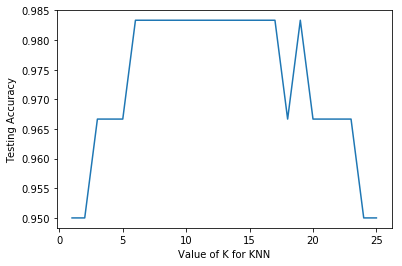

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(neighbors_setting, scores)

plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

In [12]:
# এখানে দেখছি ৭ থেকে ১৭ পর্যন্ত অ্যাক্যুরেসি ভালো, টেস্ট করছি ১০ দিয়ে 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [13]:
# নেইবার্স ১০ ধরলাম 
knn = KNeighborsClassifier(n_neighbors=10)

# মডেলকে ট্রেইন করতে হবে X এবং y দিয়ে (X_train, y_train নয়)
knn.fit(X, y)

# প্রেডিক্ট করি নতুন স্যাম্পল দিয়ে 
knn.predict([[3, 5, 4, 2]])

array([1])

In [14]:
print("Predicted target name:", iris['target_names'][knn.predict([[3, 5, 4, 2]])])

Predicted target name: ['versicolor']


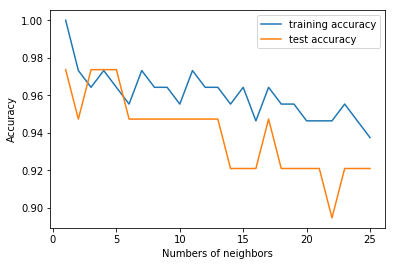

In [18]:
%matplotlib inline

# আগের সব গল্প, শুধু বাড়িয়েছি n_neighbors এর সংখ্যা - ২৫ পর্যন্ত 

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 25
neighbors_settings = range(1, 26)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

#নিচের প্লটটা দেখাচ্ছে ট্রেনিং এবং টেস্ট সেটের অ্যাক্যুরেসি 
import matplotlib.pyplot as plt

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Numbers of neighbors")
plt.legend()